In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib

In [2]:
# Load dataset
file_path = "loan/train.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

In [3]:
# Drop ID column if not needed
df.drop(columns=["id"], inplace=True, errors='ignore')

In [4]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store label encoders for future use


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\59658223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["loan_status"], palette="coolwarm")


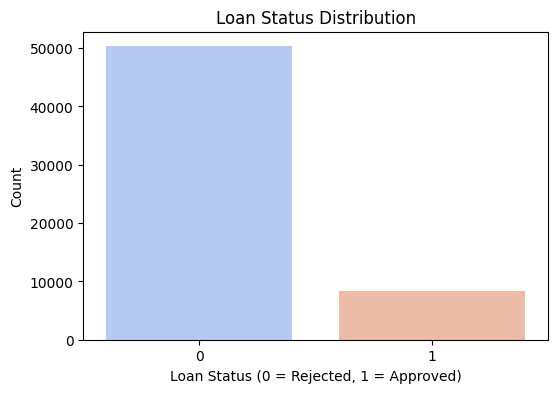

In [6]:
# 1. Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x=df["loan_status"], palette="coolwarm")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

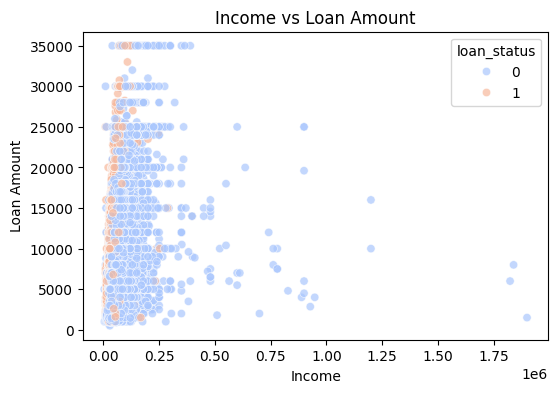

In [7]:
# 2. Scatter plot: Income vs Loan Amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["person_income"], y=df["loan_amnt"], hue=df["loan_status"], alpha=0.7, palette="coolwarm")
plt.title("Income vs Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\2557736518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["loan_grade"], palette="viridis")


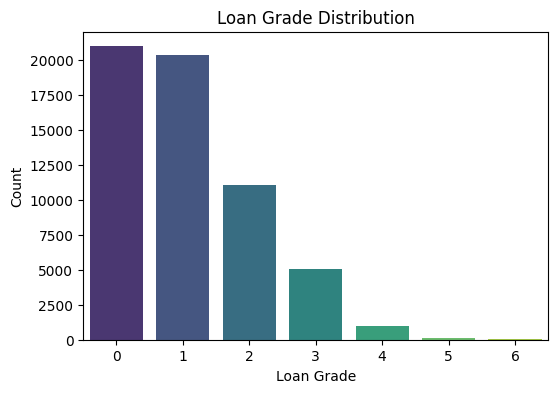

In [8]:
# 3. Loan Grade Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["loan_grade"], palette="viridis")
plt.title("Loan Grade Distribution")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\2744684909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["loan_intent"], palette="Set2")


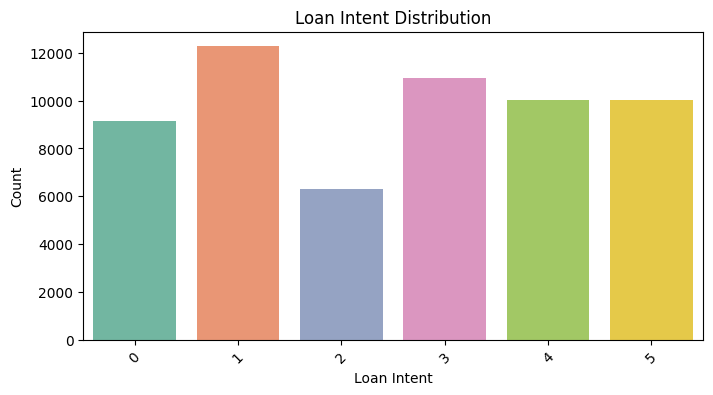

In [9]:
# 4. Loan Intent Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df["loan_intent"], palette="Set2")
plt.title("Loan Intent Distribution")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

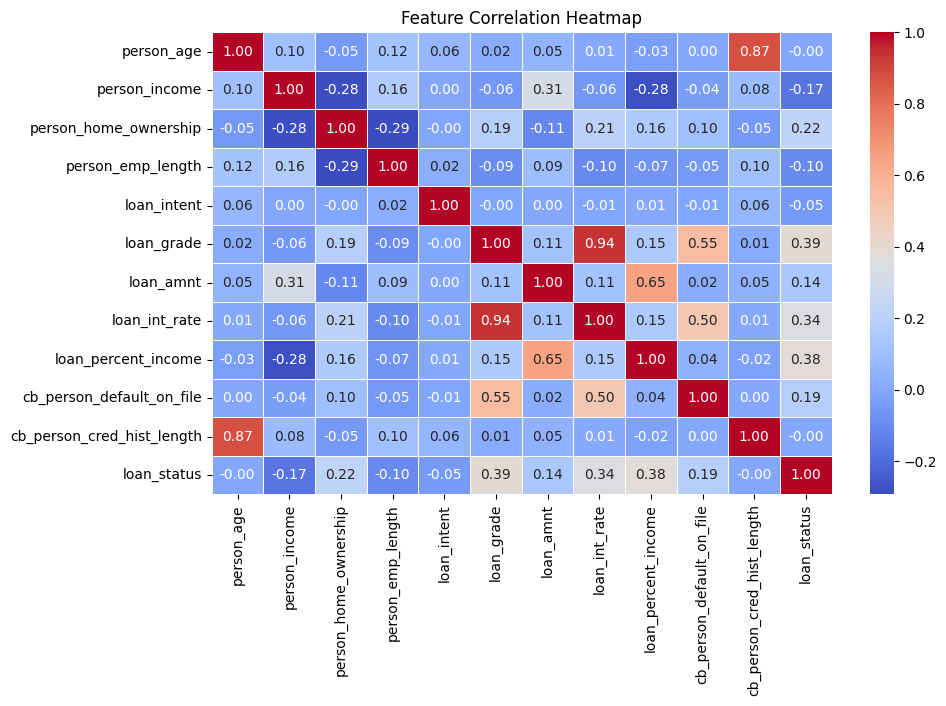

In [10]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Separate features and target
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [12]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [14]:
# Dictionary to store models and accuracy
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42)
}

In [15]:
best_model = None
best_accuracy = 0
best_model_name = ""

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

Random Forest Accuracy: 0.9494
Decision Tree Accuracy: 0.9125
Support Vector Machine Accuracy: 0.8972


In [16]:
# Save the best model
joblib.dump(best_model, "best_loan_status_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print(f"\n🎉 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
print("Best model saved successfully!")


🎉 Best Model: Random Forest with Accuracy: 0.9494
Best model saved successfully!


C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\3807790227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


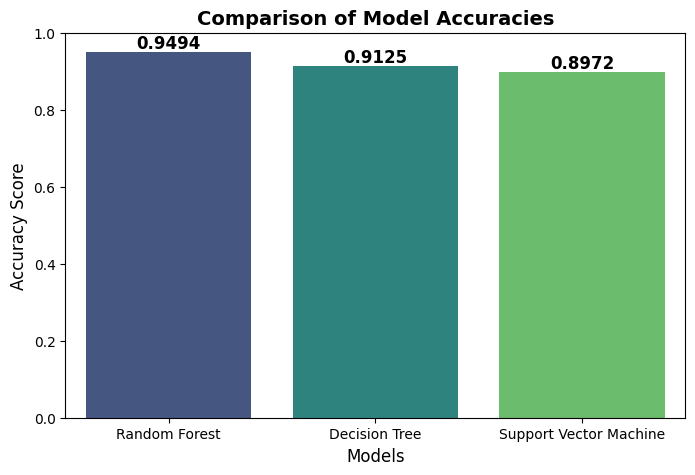

In [17]:
# Store model names and their accuracy scores
model_names = ["Random Forest", "Decision Tree", "Support Vector Machine"]
accuracies = [accuracy_score(y_test, models[name].predict(X_test)) for name in model_names]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha="center", fontsize=12, fontweight="bold")

# Titles and labels
plt.title("Comparison of Model Accuracies", fontsize=14, fontweight="bold")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Show the plot
plt.show()

In [18]:
import pandas as pd
import joblib

# Load the trained model, scaler, and label encoders
best_model = joblib.load("best_loan_status_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

In [19]:
# Load test dataset
test_file = "loan/test.csv"
test_df = pd.read_csv(test_file)

# Store IDs separately
test_ids = test_df["id"]

# Drop ID column if present
test_df.drop(columns=["id"], inplace=True, errors='ignore')

# Encode categorical variables using saved label encoders
categorical_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

In [20]:
for col in categorical_cols:
    if col in test_df.columns:
        test_df[col] = label_encoders[col].transform(test_df[col])

# Standardize numerical features using saved scaler
test_df[test_df.columns] = scaler.transform(test_df)

# Predict loan_status for the test dataset
predictions = best_model.predict(test_df)

# Save results to a CSV file
output_df = pd.DataFrame({"id": test_ids, "loan_status": predictions})
output_df.to_csv("predictions.csv", index=False)

print("✅ Predictions saved to predictions.csv!")

✅ Predictions saved to predictions.csv!


In [22]:
# Load test predicted dataset
predict = pd.read_csv("predictions.csv")

predict.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
